In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


df=pd.read_csv("File_path.csv")
print(df.head())
print(df.info())
print(df.shape)


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [21]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df = df.dropna(subset=['Attrition'])
X = df[['YearsAtCompany','WorkLifeBalance','DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome','StandardHours','EnvironmentSatisfaction','YearsInCurrentRole','Age','JobInvolvement']]
y = df['Attrition']


X = X.fillna(X.mean())

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

predictions = knn.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Confusion Matrix:
 [[228  27]
 [ 25  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       255
           1       0.34      0.36      0.35        39

    accuracy                           0.82       294
   macro avg       0.62      0.63      0.62       294
weighted avg       0.83      0.82      0.82       294



Best k value based on recall: 1


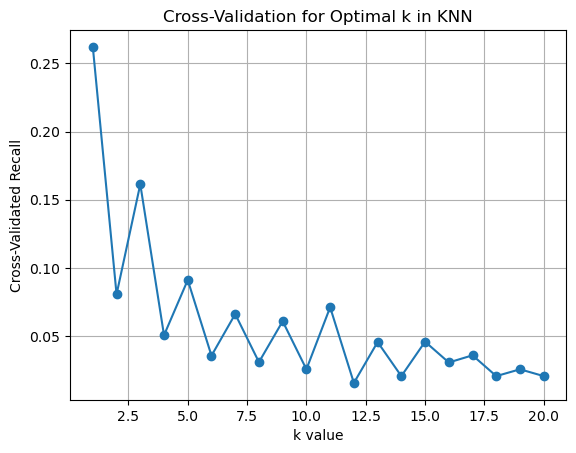

In [25]:
#cross-validation
from sklearn.model_selection import cross_val_score

# Define the range of k values to test
k_values = range(1, 21)

# Lists to store cross-validation scores
recall_scores = []

# Perform cross-validation for each k
for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=10, scoring='recall')
    recall_scores.append(scores.mean())  # Store the mean recall score

# Find the best k based on recall
best_k = k_values[recall_scores.index(max(recall_scores))]

print(f"Best k value based on recall: {best_k}")



# Plot accuracy scores
plt.plot(k_values, recall_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Cross-Validated Recall')
plt.title('Cross-Validation for Optimal k in KNN')
plt.grid()
plt.show()

